# Scikit-Learn

## Exploratory analysis

In [2]:
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import (
    datasets,
    decomposition,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
)

In [3]:
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.3.x

1.3.0


### Classification (digits)

Let's look at the classification model performance in terms of precision and recall.

#### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset

In [4]:
digits = datasets.load_digits()
print("First image of 8x8 Pixels:\n", digits.images[0])


First image of 8x8 Pixels:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [5]:
# Number of Images and their size in pixels
n_samples = len(digits.images)
print("Number of images:", digits.images.shape[0], "Pixels:", digits.images.shape[1:])

# Flatten the images:
# Here, reshape is used to transform each two-dimensional image into a one-dimensional vector.
# The parameter [n_samples, -1] indicates that the first axis (n_samples) remains the same, 
# and the second axis (representing the height and width of the image) is collapsed into a single axis. 
data = digits.images.reshape([n_samples, -1])
labels = digits.target
print(data.shape, labels.shape)
print("Same first image but reshaped to 64x1:\n", data[0])


Number of images: 1797 Pixels: (8, 8)
(1797, 64) (1797,)
Same first image but reshaped to 64x1:
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Randomly select the training and test dataset.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#### Train the models

Train the model using, e.g., the [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

In [7]:
# 1. Model choice (import)
from sklearn.naive_bayes import GaussianNB

# 2. Instantiation - Calling the model
naive_bayes_model = GaussianNB()

# 3. Learn (fit) the models - TRAINING
naive_bayes_model.fit(X_train, y_train)

# 4. Predict on new data - PREDICTION
naive_bayes_predictions = naive_bayes_model.predict(X_test)

#### Evaluate

Evaluate with the [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Then give a more complete result, including precision, recall and f1-score with the method [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [8]:
# Evaluation according to the performance metric "Accuracy"
# Compute Accuracy with Sklearn
from sklearn.metrics import accuracy_score

print("Naive Bayes Model:")
accuracy_naive_bayes_predictions = accuracy_score(y_test, naive_bayes_predictions)
print("Accuracy:", accuracy_naive_bayes_predictions, "\n")

# Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
classification_report_naive_bayes_prediction = classification_report(y_test, naive_bayes_predictions)
print(classification_report_naive_bayes_prediction)


Naive Bayes Model:
Accuracy: 0.8164983164983165 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.90      0.64      0.74        55
           2       0.85      0.54      0.66        52
           3       0.95      0.70      0.80        56
           4       0.98      0.84      0.91        64
           5       0.78      0.89      0.83        73
           6       0.90      0.96      0.93        57
           7       0.71      0.98      0.82        62
           8       0.54      0.92      0.68        52
           9       0.89      0.69      0.78        68

    accuracy                           0.82       594
   macro avg       0.85      0.81      0.81       594
weighted avg       0.85      0.82      0.82       594



In [9]:
# If you want the Classification Report as a dictionary
print("Classification Report:")
classification_report_naive_bayes_prediction_dict = classification_report(y_test, naive_bayes_predictions, output_dict=True)
print(classification_report_naive_bayes_prediction_dict)


Classification Report:
{'0': {'precision': 0.9814814814814815, 'recall': 0.9636363636363636, 'f1-score': 0.9724770642201834, 'support': 55.0}, '1': {'precision': 0.8974358974358975, 'recall': 0.6363636363636364, 'f1-score': 0.7446808510638298, 'support': 55.0}, '2': {'precision': 0.8484848484848485, 'recall': 0.5384615384615384, 'f1-score': 0.6588235294117647, 'support': 52.0}, '3': {'precision': 0.9512195121951219, 'recall': 0.6964285714285714, 'f1-score': 0.8041237113402062, 'support': 56.0}, '4': {'precision': 0.9818181818181818, 'recall': 0.84375, 'f1-score': 0.9075630252100839, 'support': 64.0}, '5': {'precision': 0.7831325301204819, 'recall': 0.8904109589041096, 'f1-score': 0.8333333333333334, 'support': 73.0}, '6': {'precision': 0.9016393442622951, 'recall': 0.9649122807017544, 'f1-score': 0.9322033898305084, 'support': 57.0}, '7': {'precision': 0.7093023255813954, 'recall': 0.9838709677419355, 'f1-score': 0.8243243243243245, 'support': 62.0}, '8': {'precision': 0.53932584269662

#### Confusion matrix

Use the method [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
to display the confusion matrix.

Briefly comment on the results.

Note that the `.confusion_matrix` attribute of the object returned by this method allows to obtain the confusion matrix in the form of an array.

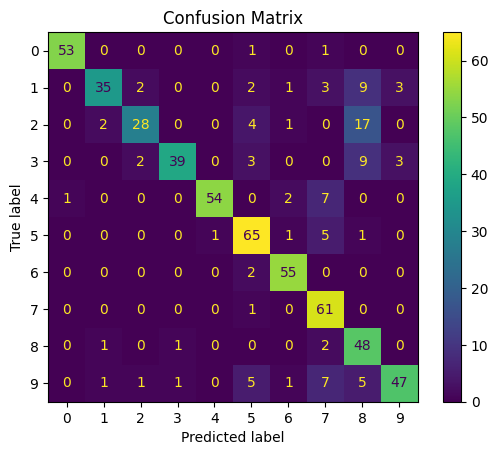

In [10]:
# Confusion Matrix with Skleanr
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrix = confusion_matrix(y_test, naive_bayes_predictions, labels=naive_bayes_model.classes_)
display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix)
display_confusion_matrix.plot()
display_confusion_matrix.ax_.set_title("Confusion Matrix")
plt.show()

# We have already calculated the "support" (number of elements per class) for each class in the Classification Report
# To extract the support (or any other metric) and store them in a list
support = {}
for pos, (class_name, metrics) in enumerate(classification_report_naive_bayes_prediction_dict.items()):
    if type(metrics) is dict and pos < 10:
        support[f"D{pos}"] = metrics["support"]
#print(support)


#### Error visualization

Identify the most confusing cases.

Identify misclassified instances for the lowest f1-scoring cipher class and visualize them with the code below.

You may use the function [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to find the index of the concerned instances.

Coordinates of Mislabeled Predictions: 
 [(0, 0), (0, 5), (0, 7), (1, 1), (1, 2), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 1), (2, 2), (2, 5), (2, 6), (2, 8), (3, 2), (3, 3), (3, 5), (3, 8), (3, 9), (4, 0), (4, 4), (4, 6), (4, 7), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 5), (6, 6), (7, 5), (7, 7), (8, 1), (8, 3), (8, 7), (8, 8), (9, 1), (9, 2), (9, 3), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


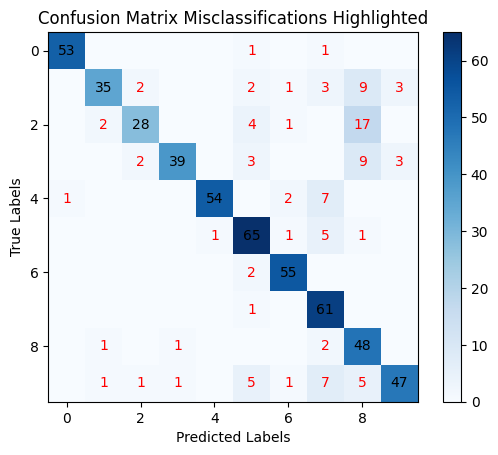

In [11]:
# In order to determine the most confusing cases, we just need to highlight them in the confusing matrix

# Non-zero elements represent misclassifications in the Confusion Matrix, the only 
mislabeled_predictions = np.where(ConfusionMatrix != 0)
#print(mislabeled_predictions)
#print("Mislabeled Row predictions", most_confusing_indices[0])
#print("Mislabeled Column predictions", most_confusing_indices[1])

# It's like a Matrix position (Row, Col)
print("Coordinates of Mislabeled Predictions:", "\n", [(row, col) for (row, col) in zip(mislabeled_predictions[0], mislabeled_predictions[1])])

# Visualize the confusion matrix with the misclassifications highlighted
plt.imshow(ConfusionMatrix, cmap='Blues')
plt.colorbar()

mislabeled_predictions = np.where(ConfusionMatrix != 0)
# Highlight the most confusing cases
for i, j in zip(mislabeled_predictions[0], mislabeled_predictions[1]):
    if i != j:
        plt.text(j, i, ConfusionMatrix[i, j], ha='center', va='center', color='red')
    if i == j:
        plt.text(j, i, ConfusionMatrix[i, j], ha='center', va='center')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Misclassifications Highlighted')
plt.show()

(array([  5,  52, 156, 426, 488], dtype=int64),)


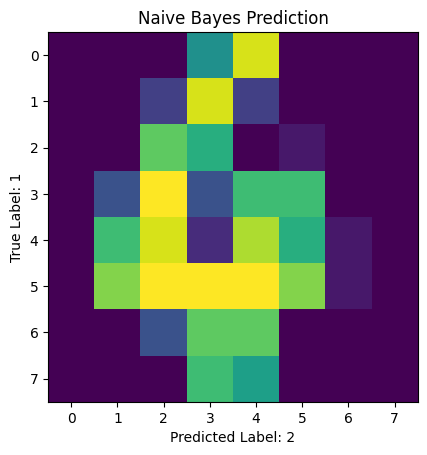

In [12]:
# We have already calculated the "F1-score" for each class in the Classification Report
# To extract the f1_score and store it in a list
f1_scores = {}
for pos, (class_name, metrics) in enumerate(classification_report_naive_bayes_prediction_dict.items()):
    if type(metrics) is dict and pos < 10:
        f1_scores[f"{pos}"] = metrics['f1-score']
#print("Class Name and F1-Scores:")
#print(f1_scores)

# Find the class with the lowest F1 score (after finding the min, the value we obtain is "2" as string (.get is for keys)). 
# So, we convert it.
lowest_f1_class = int(min(f1_scores, key=f1_scores.get))
#print(lowest_f1_class)

# Crafted way to find the indices / index of the images which are mislabeled according to the lowest F1-Score = 2 (-> Class 2)
#for pos, (pred, test) in enumerate(zip(naive_bayes_predictions, y_test)):
#   if pred == lowest_f1_class and test != lowest_f1_class:
#       print(pos, pred, test)

# Find the indices of instances belonging to the lowest F1-scoring class
misclassified_indices_lowest_f1 = np.where((naive_bayes_predictions == lowest_f1_class) & (y_test != lowest_f1_class))
print(misclassified_indices_lowest_f1)

# Visualize the misclassified instances
#for index in misclassified_indices_lowest_f1:
    
plt.imshow(X_train[5].reshape((8,8)))
plt.title('Naive Bayes Prediction')
plt.xlabel(f'Predicted Label: {naive_bayes_predictions[5]}')
plt.ylabel(f'True Label: {y_test[5]}')
plt.show()


### <span style="color:red">NOT ABLE TO VISUALIZE THROUGH LOOP THE 5 MISLABELED IMAGES</span>

---

### PCA

#### PCA and training/evaluation data selection

In [13]:
from sklearn.decomposition import PCA

# Data split into Training & Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(data, labels, test_size=0.33, random_state=42)

# PCA transformation & Relevance of each component
# Ideally, when you do the PCA for n_component = 29 you obtain 95% of the data so we could dispense with more than half of the data
# However, for this exercise they want us to do it with 10 components, keeping therefore 74% of the most relevant data
pca = PCA(n_components = 10)
X_Train_pca = pca.fit_transform(X_Train)
X_Test_pca = pca.transform(X_Test)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print("Variance per component:", explained_variance, "\n")
print("Acumulative variance per number of components:", cumulative_variance)


Variance per component: [0.14906033 0.13711025 0.11889626 0.08522383 0.05594327 0.04965243
 0.04262563 0.03601751 0.03329772 0.03055898] 

Acumulative variance per number of components: [0.14906033 0.28617058 0.40506684 0.49029067 0.54623393 0.59588636
 0.63851199 0.6745295  0.70782722 0.7383862 ]


#### Model training

In [14]:
# 1. Model choice (import)
from sklearn.naive_bayes import GaussianNB

# 2. Instantiation - Calling the model
naive_bayes_model_pca = GaussianNB()

# 3. Learn (fit) the models - TRAINING
naive_bayes_model_pca.fit(X_Train_pca, Y_Train)

# 4. Predict on new data - PREDICTION
naive_bayes_predictions_pca = naive_bayes_model_pca.predict(X_Test_pca)

#### Evaluation

Naive Bayes Model - PCA:

Accuracy with PCA: 0.9023569023569024
Accuracy without PCA: 0.8164983164983165 

Classification Report with PCA:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.79      0.89      0.84        55
           2       0.93      0.96      0.94        52
           3       0.92      0.84      0.88        56
           4       0.97      0.95      0.96        64
           5       0.93      0.85      0.89        73
           6       1.00      0.96      0.98        57
           7       0.91      0.95      0.93        62
           8       0.86      0.81      0.83        52
           9       0.78      0.88      0.83        68

    accuracy                           0.90       594
   macro avg       0.91      0.90      0.90       594
weighted avg       0.91      0.90      0.90       594



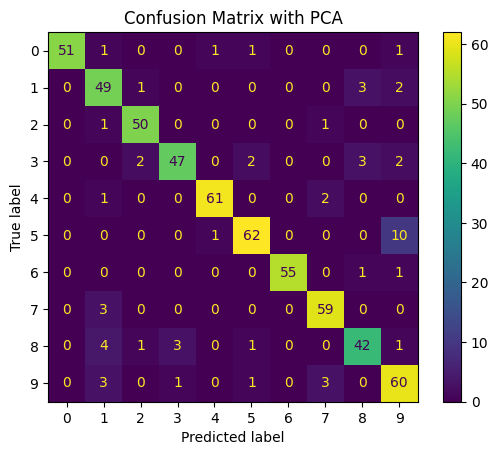

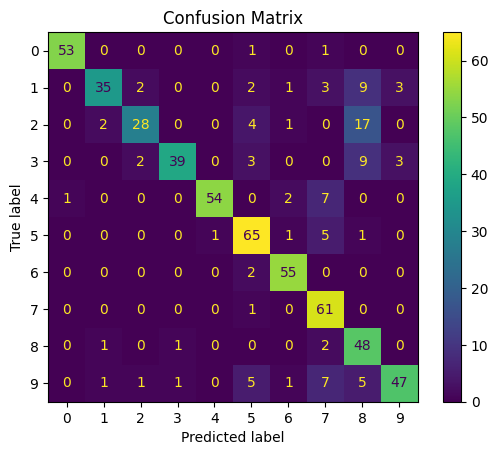

In [15]:
# Evaluation according to the performance metric "Accuracy"
# Compute Accuracy with Sklearn
from sklearn.metrics import accuracy_score

print("Naive Bayes Model - PCA:\n")
accuracy_naive_bayes_predictions_pca = accuracy_score(Y_Test, naive_bayes_predictions_pca)
print("Accuracy with PCA:", accuracy_naive_bayes_predictions_pca)
print("Accuracy without PCA:", accuracy_naive_bayes_predictions, "\n")

# Classification Report
from sklearn.metrics import classification_report
print("Classification Report with PCA:")
classification_report_naive_bayes_prediction_pca = classification_report(Y_Test, naive_bayes_predictions_pca)
print(classification_report_naive_bayes_prediction_pca)

# Confusion Matrix with Skleanr
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrix_pca = confusion_matrix(Y_Test, naive_bayes_predictions_pca, labels=naive_bayes_model.classes_)
display_confusion_matrix_pca = ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix_pca)
display_confusion_matrix_pca.plot()
display_confusion_matrix_pca.ax_.set_title("Confusion Matrix with PCA")
plt.show()

ConfusionMatrix = confusion_matrix(y_test, naive_bayes_predictions, labels=naive_bayes_model.classes_)
display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix)
display_confusion_matrix.plot()
display_confusion_matrix.ax_.set_title("Confusion Matrix")
plt.show()

---

### Cross-Validation

#### Data preparation

Use the function [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to implement cross-validation.

You may choose to do 10 splits (`cv=10`).

Choose as *scoring* `"f1_weighted"`, then the function will return the corresponding scores in an array.

By way of example and in order to be able to compare the results with the previous ones, the first application will be done on the entire dataset (which is usually not recommended).

Show the results with a [`plt.bar`] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) which includes an error bar `yerr` equal to 1 [standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html), as well as in a [`boxplot`](https://matplotlib.org/stable/api/_as_gen/ matplotlib.pyplot.boxplot.html).

### NOTE:

The weigthed f1-Score is described mathematically as it follows:
$$ F1_{\text{weighted}} = \frac{\sum_{i=1}^{C} w_i \cdot F1_i}{\sum_{i=1}^{C} w_i} $$
where $ C $ is the number of classes, $ F1_{i} $ is the value of the f1-score for the class $ i $ and $ w_{i} $ is the weight of each class, i.e, $$ w_{i} = \frac{\text{instances of class i}}{\text{total instances}} $$ 

Cross-validation involves splitting the dataset into multiple folds (partitions), training the model on some folds, and evaluating on others. 

For each fold, a performance score (such as accuracy, F1-score, etc.) is calculated.

[0.74643939 0.80864546 0.90456151 0.68155889 0.74197066 0.83962727
 0.86848612 0.86512307 0.82646416 0.81156665]


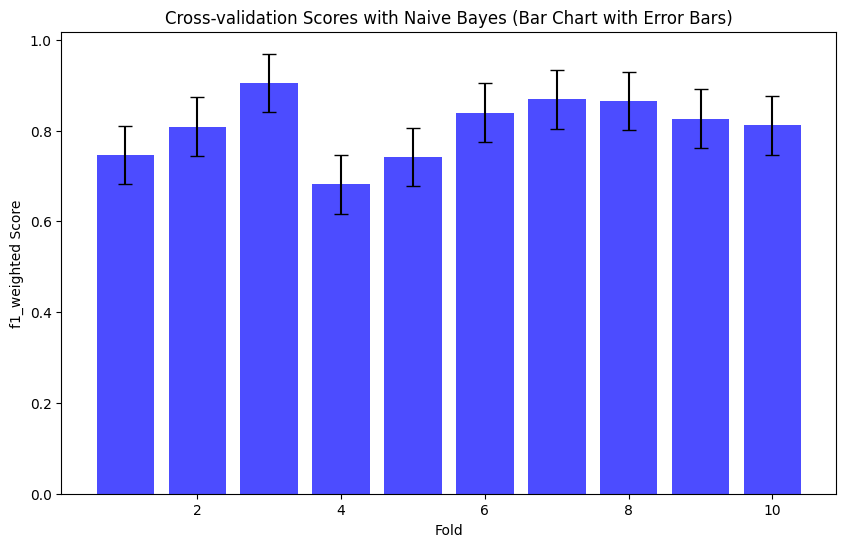

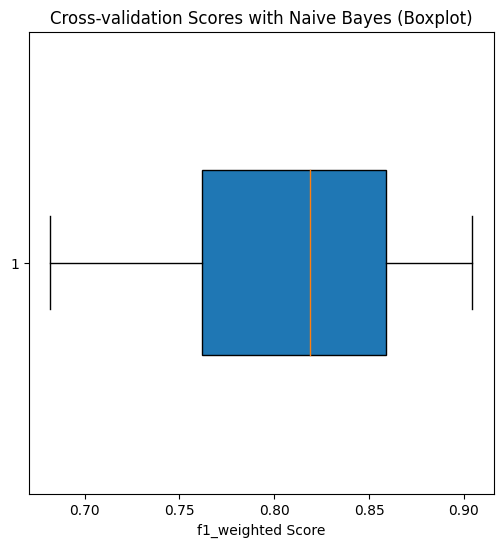

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define the scoring metric as "f1_weighted"
score_function = 'f1_weighted'

# Cross-Validation with 10 splits
cv_scores = cross_val_score(naive_bayes_model, data, labels, cv=10, scoring=score_function)
print(cv_scores)

# The mean_score is the average of the performance f1-score across all folds.
# Each time the model is trained and evaluated on a different subset of the data,
# a performance score is obtained. The mean_score is the average of these scores 
# across all folds, providing an overall estimation of the model's performance.
# Exactly the same applies to the standard deviation.
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Plotting the bar chart with error bars
plt.figure(figsize=(10, 6))
# This "range(1, len(cv_scores) + 1)" specifies the x-axis values for the bars, ranging from 1 to the number of cross-validation folds.
# The "cv_scores" are the y-axis values, representing the mean F1-weighted scores for each fold.
# The "yerr=std_dev" specifies the error bars using the standard deviation (std_dev). This helps visualize the variability of scores.
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='blue', alpha=0.7, yerr=std_dev, capsize=5)
plt.xlabel('Fold') # Partición del training set
plt.ylabel('f1_weighted Score')
plt.title('Cross-validation Scores with Naive Bayes (Bar Chart with Error Bars)')
plt.show()

# Plotting the boxplot (inside the blue box it's represented 50% of the data)
plt.figure(figsize=(6, 6))
# The "cv_scores" is the data array containing the F1-weighted scores for each fold in cross-validation.
# The "vert=False" specifies that the boxplot should be horizontal.
# The "widths=0.7" sets the width of the boxes in the boxplot.
# The "patch_artist=True" allows for filling the boxes with color, making the plot more visually informative.
plt.boxplot(cv_scores, vert=False, widths=0.4, patch_artist=True)
plt.xlabel('f1_weighted Score')
plt.title('Cross-validation Scores with Naive Bayes (Boxplot)')
plt.show()

---

### Grid Search

This time, we are going to use cross-validation for one of its primary use: to validate the choice of hyperparameters.

We will use the class
[`model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose the best number of main components for the PCA.

This class makes it possible to test several hyperparameters (stored in a dictionary) and to test them via cross-validation (hence the CV in the name).

To do this, we no longer need to worry about creating the different subsets, the `GridSearchCV` class does it for us.

We're going to use a [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to do PCA compression and training with the model together, which will allow us to modify the hyperparameters at any step of the process through a single command.

We will have to use the exact names of the hyperparameters to modify in the dictionary, preceded by the name of the module and a double *underscore* (e.g., here: `"pca__"`), in order to be able to assign them to the right step of the `pipeline`.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the pipeline with PCA and the model
pipe = Pipeline([
    ('pca', PCA()),
    ('Naive Bayes Model', naive_bayes_model)  # Replace with your chosen model
])

In [18]:
# Define the parameter grid
param_grid = {"pca__n_components": [1, 2, 5, 10, 20, 30, 40, 60]}

In [19]:
# Define the gridsearch using the pipeline and fit the model
# The "cv=10" specifies 10-fold cross-validation
# The "scoring=f1-weighted" indicated the metric to optimize
grid_search = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_weighted')

# Fitting the model (the data used is the original one = first model)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('Naive Bayes Model', GaussianNB())]),
             param_grid={'pca__n_components': [1, 2, 5, 10, 20, 30, 40, 60]},
             scoring='f1_weighted')

In [20]:
# Print the best prediction score obtained
# and its corresponding hyperparameter value
results = grid_search.cv_results_
#print(results)
print("Best Parameters:", grid_search.best_params_)


# Extract the hyperparameters and scores
param_values = results['param_pca__n_components'].data
print("The parameter grid", param_values)

# The "mean_scores" represents the mean (average) value of the evaluation metric 
# (in this case, the weighted F1 score) for each hyperparameter configuration
mean_scores = results['mean_test_score']
print("The mean weighted f1-score for each training:", mean_scores)

# The "std_dev_scores" represents the standard deviation of the weighted F1 scores for each 
# hyperparameter configuration over the different folds of cross-validation
std_dev_scores = results['std_test_score']
print("The standard deviation weighted f1-score for each training:", std_dev_scores)

Best Parameters: {'pca__n_components': 40}
The parameter grid [1 2 5 10 20 30 40 60]
The mean weighted f1-score for each training: [0.34869021 0.63122422 0.82556953 0.90763508 0.93516617 0.92984961
 0.93780786 0.90230329]
The standard deviation weighted f1-score for each training: [0.01702779 0.03091614 0.03286849 0.02194641 0.02012748 0.01907665
 0.02140648 0.03182044]


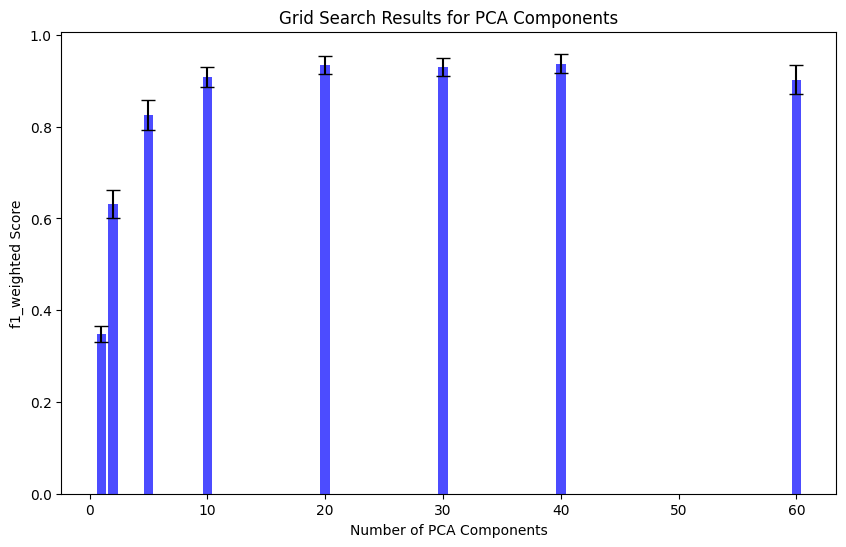

In [21]:
# Plot a bar plot (or boxplot) showing the different prediction scores
# for each tested hyperparameter
# (including the error bars if bar plots are chosen)

# Plot a bar chart with error bars
plt.figure(figsize=(10, 6))
plt.bar(param_values, mean_scores, color='blue', alpha=0.7, yerr=std_dev_scores, capsize=5)
plt.xlabel('Number of PCA Components')
plt.ylabel('f1_weighted Score')
plt.title('Grid Search Results for PCA Components')
plt.show()

## Further exercises

Using the `.predict_proba` method of` linear_model.LogisticRegression`, use the result of the prediction to select a particular threshold (*threshold*) to influence the classification performances.

*   Can you get 100% [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)?
*   Can you get 100% of [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)?
*   Measure the values of [f1-scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and comment.
*   Plot the [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) from multiple threshold values.
*   Compare the [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) (area under the ROC curve) of the `linear_model.LogisticRegression` and of `naive_bayes. GaussianNB()`.

1. Achieving 100% accuracy or recall is theoretically possible but practically challenging, especially on complex, real-world datasets.
2. 100% accuracy means that every single prediction made by the model is correct, which is rare in practice due to noise and complexity in data.
3. 100% recall means that the model correctly identifies all positive instances. However, this often comes at the cost of increased false positives, reducing precision.
4. To manipulate these metrics, you can adjust the classification threshold in logistic regression. By default, a threshold of 0.5 is used for binary classification. Lowering the threshold can increase recall (more true positives) but may decrease precision. Conversely, raising the threshold can increase precision but lower recall.

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Instantiation
logistic_regression_model = LogisticRegression()

# Fit the model
logistic_regression_model.fit(X_train, y_train)

# Step 1: Get the probability predictions
prob_predictions = logistic_regression_model.predict_proba(X_test)

# Step 2: Select a threshold (for example, 0.3)
threshold = 0.2

# Step 3: Convert probabilities to class labels based on the threshold
class_predictions = np.where(prob_predictions[:, 1] > threshold, 1, 0)

# Step 4: Evaluate performance
# Use 'weighted' or another appropriate average for multi-class classification
precision = precision_score(y_test, class_predictions, average='weighted')
recall = recall_score(y_test, class_predictions, average='weighted')
f1 = f1_score(y_test, class_predictions, average='weighted')

print(f"Threshold: {threshold}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Threshold: 0.2
Precision: 0.09411157812470215
Recall: 0.18181818181818182
F1-Score: 0.10409058415287546


c:\Users\pmoll\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pmoll\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
